# 40 the perceptron and ANN architecture

In [ ]:
# hyperplane: just the decision boundary of a multidimentional, when it is one dimension, the boundary is a line, when it is two dimension
# the boundary is a plane.

# 42 Forward propogation

In [ ]:
# activation function: the function to take the linear result as input and produce the next node of the model
# mostly used activation functions:
  # Sigmoid
  # Hyperbolic tangent
  # ReLU

In [ ]:
# Forward propogation: Compute output based on iput
# Backwards propogation (backprop): Adjust the weights based on loss/cost

# 45 ANN for regression

In [ ]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

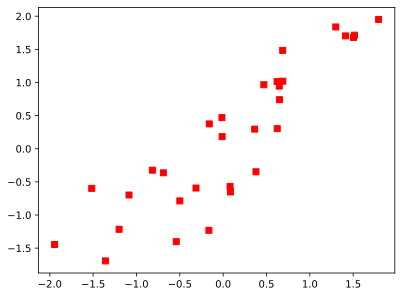

In [ ]:
# create data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2

plt.plot(x, y, 'rs')
plt.show()

In [ ]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1), # input layer
    nn.ReLU(), # activation function
    nn.Linear(1, 1) # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# learning rate
learningRate = 0.05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)


In [ ]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()



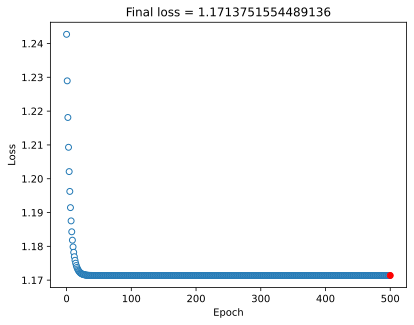

In [ ]:
# show the loss

# manually compute losses
# final forward pass
predictions = ANNreg(x)

testloss = (predictions -y).pow(2).mean()

# testloss has a grad_fn, using detach to get only a tensor
# testloss.item() only give the number
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)

plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final loss = {testloss.item()}')
plt.show()

In [ ]:
testloss, testloss.item(), losses[-1].item()


(tensor(1.1714, grad_fn=<MeanBackward0>),
 1.1713751554489136,
 1.1713751554489136)

In [ ]:
for i in range(5):
  print(losses.detach()[i], losses.detach()[i].item())


tensor(1.2427) 1.2427126169204712
tensor(1.2289) 1.228949785232544
tensor(1.2181) 1.2181150913238525
tensor(1.2093) 1.209295630455017
tensor(1.2021) 1.2021092176437378


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


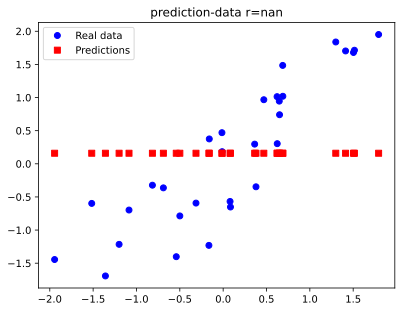

In [ ]:
# plot the data
plt.plot(x, y, 'bo', label = 'Real data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0, 1]:.2f}')
plt.legend()
plt.show()


# 46 Code challenge: manipulate regression slopes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# 1) define model and train function

def build_train_model(x, y, learningRate = 0.05, numepochs = 500):

  # build the model
  ANNreg = nn.Sequential(
      nn.Linear(1, 1), # input layer
      nn.ReLU(), # activation function
      nn.Linear(1, 1) # output layer
  )

  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    yHat = ANNreg(x)
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

  return ANNreg(x), losses



In [ ]:
predictions, losses = build_train_model(x, y)

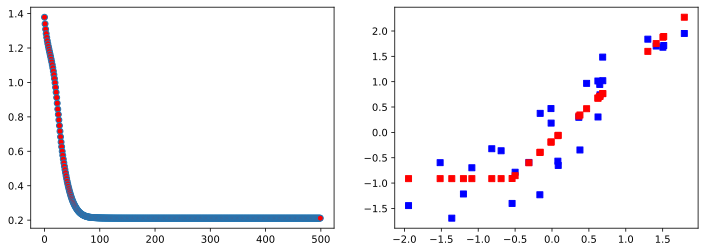

In [ ]:
# quick plot to test the function
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(losses.detach(), 'o', markerfacecolor = 'r', linewidth = 0.01)
ax[1].plot(x, y, 'bs', x, predictions.detach(), 'rs')
plt.show()


In [ ]:
# define a function to generate data
def gen_data(m, N = 50):
  # create data
  x = torch.randn(N, 1)
  y = m*x + torch.randn(N, 1) / 2
  #plt.plot(x, y, 'rs')
  return x, y

In [ ]:
experiments = 50
slopes = torch.linspace(-2, 2, 21)

expr_res = np.zeros((experiments, len(slopes), 2))
for exprt in range(experiments):
  # initiate some params here

  for slope_idx, slope in enumerate(slopes):
    x, y = gen_data(slope)
    predictions, losses = build_train_model(x, y, numepochs = 100)

    final_loss = (predictions - y).pow(2).mean()
    accuracy = np.corrcoef(y.T, predictions.detach().T)[0, 1]

    expr_res[exprt, slope_idx, 0] = losses[-1]
    expr_res[exprt, slope_idx, 1] = accuracy

expr_res[np.isnan(expr_res)] = 0









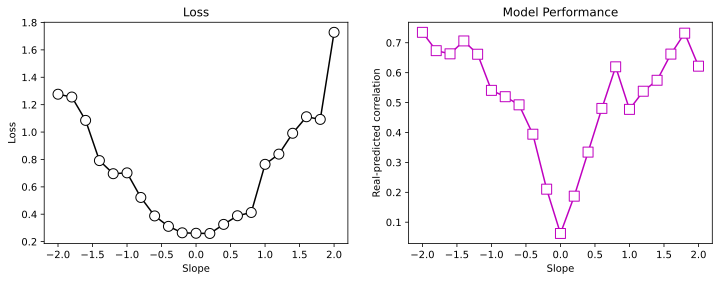

In [ ]:
fix, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(slopes, np.mean(expr_res[:, :, 0], axis=0), 'ko-', markerfacecolor = 'w', markersize = 10)
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss')

ax[1].plot(slopes, np.mean(expr_res[:, :, 1], axis=0), 'ms-', markerfacecolor = 'w', markersize = 10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model Performance')
plt.show()

In [ ]:
# Observations:
# 1. the larger the slope, the larger the loss
  # reason: because the losses are not normalized. Losses can only be compared on the same data, or on different datasets that are not normalized to the same numeric range.

# 2. The smaller slope, the lower accuracy (performance) of the model
  # reason: when slope is small, x is less informative about y, and the relationship between x and y are more random. ANNs don't predict data values, they learn relationships
  # across variables (which might be too complex for humans)
  #

# 47 ANN for classifying qwerties

In [ ]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

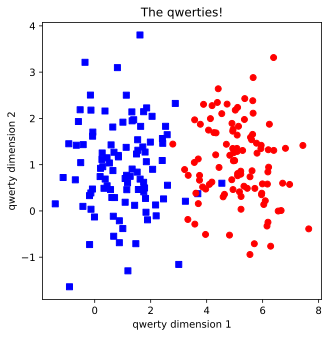

In [ ]:
# create data
nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

# generate data, a and b will be a list of 2 lists, the inter list will be 100 elements
a0 = A[0]+np.random.randn(nPerClust) * blur
a1 = A[1]+np.random.randn(nPerClust) * blur
a = [a0, a1]

b0 = B[0]+np.random.randn(nPerClust) * blur
b1 = B[1]+np.random.randn(nPerClust) * blur
b = [b0, b1]

# true labels, will be 200X1 array, 100 0s, and 100 1s
# zeros is 100 X1, ones is 100 X 1, vstack forms 200  X 1 array
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatenate into a matrix, data_np will be 200 * 2 array
# h stack forms the 2 X 200 array like
# a0, b0
# a1, b1

# after transpose, it forms 200 * 2 array like
# a0.T, a1.T
# b0.T, b1.T
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels ==0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels ==1)[0], 1], 'ro')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2, 1), # input layer
    nn.ReLU(), # activation unit
    nn.Linear(1, 1),
    nn.Sigmoid(), # the final activation unit

)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# other model features
learningRate = 0.01

# loss function, binary classification error loss function
# BCEWithLogitsLoss is more numerically stable. But ok for now
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

In [ ]:
# train the model
numepochs = 10000
losses = torch.zeros(numepochs)

for i in range(numepochs):
  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat, labels)
  losses[i] = loss

  # back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

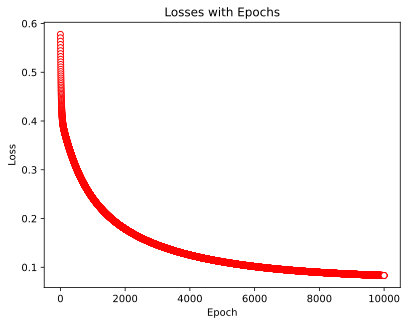

In [ ]:
# show the losses
plt.plot(losses.detach(), 'ro', markerfacecolor = 'w', linewidth = 0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses with Epochs')
plt.show()

In [ ]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

totalacc

98.0

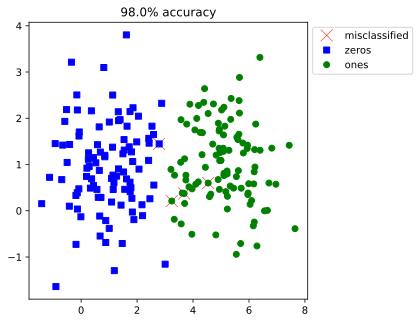

In [ ]:
# plot the labelled data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize = 12, markeredgewidth = 0.5)
plt.plot(data[np.where(~predlabels)[0], 0], data[np.where(~predlabels)[0], 1], 'bs')
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0], 1], 'go')

plt.legend(['misclassified', 'zeros', 'ones'], bbox_to_anchor = (1, 1))
plt.title(f'{totalacc}% accuracy')
plt.show()

# 48 Learning rates comparison

In [ ]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

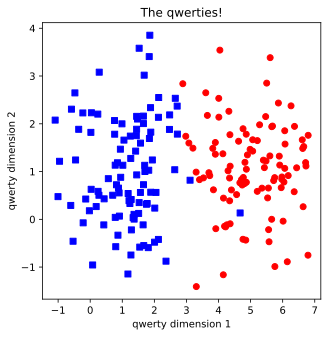

In [ ]:
# create data, the same data as in the last session
nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

# generate data, a and b will be a list of 2 lists, the inter list will be 100 elements
a0 = A[0]+np.random.randn(nPerClust) * blur
a1 = A[1]+np.random.randn(nPerClust) * blur
a = [a0, a1]

b0 = B[0]+np.random.randn(nPerClust) * blur
b1 = B[1]+np.random.randn(nPerClust) * blur
b = [b0, b1]

# true labels, will be 200X1 array, 100 0s, and 100 1s
# zeros is 100 X1, ones is 100 X 1, vstack forms 200  X 1 array
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatenate into a matrix, data_np will be 200 * 2 array
# h stack forms the 2 X 200 array like
# a0, b0
# a1, b1

# after transpose, it forms 200 * 2 array like
# a0.T, a1.T
# b0.T, b1.T
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels ==0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels ==1)[0], 1], 'ro')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:
# define model function
def define_model(learningRate):
  ANNclassify = nn.Sequential(
      nn.Linear(2, 1), # input layer
      nn.ReLU(), # activation unit
      nn.Linear(1, 1), # back prop
      #nn.Sigmoid(), # the final activation unit

  )
  lossfunc= nn.BCEWithLogitsLoss()

  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)
  return ANNclassify, optimizer, lossfunc

In [ ]:
# train models
def train_model(data, y, learningRate = 0.01, numepochs = 1000, lossfunc = nn.BCELoss()):

  ANNclassify, optimizer, lossfunc = define_model(learningRate)
  losses = torch.zeros((numepochs, 1))
  for epochi in range(numepochs):
    yHat = ANNclassify(data)

    # losses
    loss = lossfunc(yHat, y)
    losses[epochi] = loss

    # back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # final forward pass
    predictions = ANNclassify(data)

    # note: sigmoid the senteri is o.5, if you do below, then accuracy threshold will be 0.5
    # predictions = nn.sigmoid(ANNclassify(data) )



    # compute the predictions and report accuracy, there not used sigmoid, the threshold should be 0
    totalacc = 100 * torch.mean(((predictions >0) == labels).float())

  return losses, predictions, totalacc




In [ ]:
losses, predictions, totalacc = train_model(data, labels)


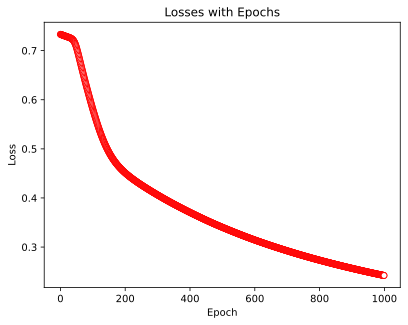

In [ ]:
# show the losses
plt.plot(losses.detach(), 'ro', markerfacecolor = 'w', linewidth = 0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses with Epochs')
plt.show()

In [ ]:
learning_rates = np.linspace(1e-1, 1e-5, 20)

In [ ]:
numepochs = 500
losses_matrix = np.zeros((len(learning_rates), numepochs))
accuracies = np.zeros((len(learning_rates), 2))
for idx, learning_rate in enumerate(learning_rates):
  losses, predictions, totalacc = train_model(
      data, labels, learningRate=learning_rate, numepochs = numepochs
      )

  accuracies[idx] = learning_rate,  totalacc

  losses_matrix[idx, :] = losses.detach().T



In [ ]:
losses_matrix.shape

(20, 500)

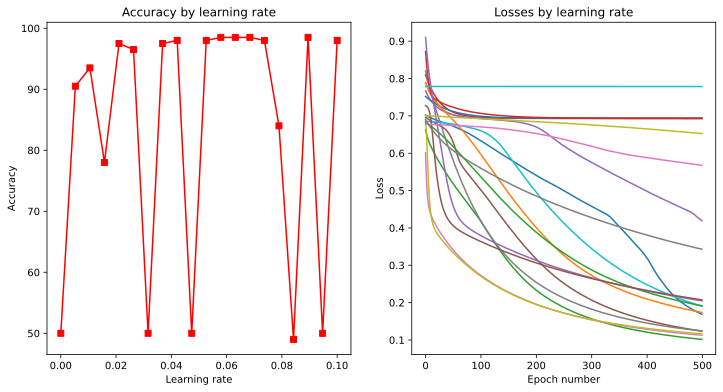

In [ ]:
# plot accuracy with learning rate
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(accuracies[:, 0], accuracies[:, 1], 'rs-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(losses_matrix.T)

ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate')

plt.show()

In [ ]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accuracies[:, 1]>70)) / len(learning_rates)

tensor(0.7500)

In [ ]:
# run a meta experiments
# run the above training by 50 times and then calculate the average of the forecast accuracy

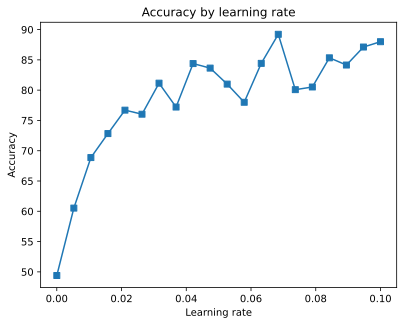

In [ ]:
experiments = 50
accMeta = np.zeros((experiments, len(learning_rates)))
numepochs = 500

for exprt in range(experiments):
  losses_matrix = np.zeros((len(learning_rates), numepochs))
  accuracies = np.zeros((len(learning_rates), 2))
  for idx, learning_rate in enumerate(learning_rates):

    losses, predictions, totalacc = train_model(
        data, labels, learningRate=learning_rate, numepochs = numepochs
        )

    accMeta[exprt, idx] = totalacc


# now plot the results, averaged over experiments
plt.plot(learning_rates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

# 49 Multilayer ANN

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

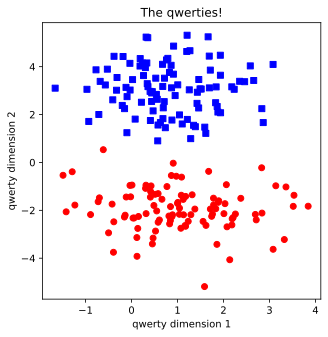

In [ ]:
# create data, the same data as in the last session
nPerClust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# generate data, a and b will be a list of 2 lists, the inter list will be 100 elements
a0 = A[0]+np.random.randn(nPerClust) * blur
a1 = A[1]+np.random.randn(nPerClust) * blur
a = [a0, a1]

b0 = B[0]+np.random.randn(nPerClust) * blur
b1 = B[1]+np.random.randn(nPerClust) * blur
b = [b0, b1]

# true labels, will be 200X1 array, 100 0s, and 100 1s
# zeros is 100 X1, ones is 100 X 1, vstack forms 200  X 1 array
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatenate into a matrix, data_np will be 200 * 2 array
# h stack forms the 2 X 200 array like
# a0, b0
# a1, b1

# after transpose, it forms 200 * 2 array like
# a0.T, a1.T
# b0.T, b1.T
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels ==0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels ==1)[0], 1], 'ro')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:
def createANNmodel(learning_rate):
  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, 16), # input layer
      nn.ReLU(), # activation unit
      nn.Linear(16, 1), # hidden layer
      nn.ReLU(), # activation unit
      nn.Linear(1, 1), # output unit
      nn.Sigmoid(), # final acivation unit
  )

  # loss function
  lossfunc = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learning_rate)

  return ANNclassify, lossfunc, optimizer

In [ ]:
# train models
def train_model(data, y, ANNclassify, lossfunc, optimizer, numepochs = 500):


  losses = torch.zeros((numepochs, 1))
  for epochi in range(numepochs):
    yHat = ANNclassify(data)

    # losses
    loss = lossfunc(yHat, y)
    losses[epochi] = loss

    # back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # final forward pass
    predictions = ANNclassify(data)

    # note: sigmoid the senteri is o.5, if you do below, then accuracy threshold will be 0.5
    # predictions = nn.sigmoid(ANNclassify(data) )



    # compute the predictions and report accuracy, used sigmoid, the threshold should be 0.5
    totalacc = 100 * torch.mean(((predictions >0.5) == labels).float())

  return losses, predictions, totalacc




final accuracy: 100.0000


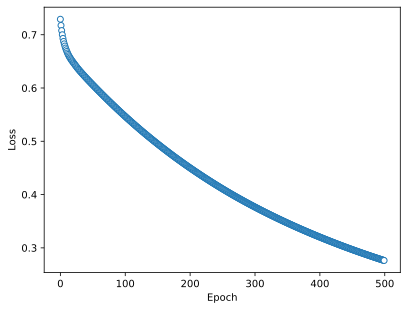

In [ ]:
# Test code by running it once
ANNclassify, lossfunc, optimizer = createANNmodel(0.01)

# train
losses, predictions, totalacc = train_model(
    data, labels, ANNclassify, lossfunc, optimizer, numepochs=numepochs
    )

# report accuracy
print(f'final accuracy: {totalacc:.4f}')

# show the loss
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

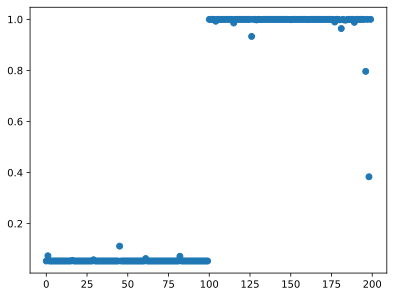

In [ ]:
plt.plot(predictions.detach(), 'o')
plt.show()

In [ ]:
# 100 * torch.mean(((predictions >0.5) == labels).float())
((predictions>0.5) == labels).float().mean() * 100

tensor(99.5000)

In [ ]:
# for the real test, varying learning rates
learning_rates = np.linspace(0.001, 0.1, 50)

# initialize
AccByLR = []
allLosses = np.zeros((len(learning_rates),numepochs))

for i, lr in enumerate(learning_rates):
  # create the model
  ANNclassify, lossfunc, optimizer = createANNmodel(lr)

  # train the model
  losses, predictions, totalacc = train_model(data, labels, ANNclassify, lossfunc, optimizer, numepochs=numepochs)

  # storing the results
  AccByLR.append(totalacc)
  allLosses[i,:] = losses.detach().T



In [ ]:
allLosses.shape

(50, 500)

[]

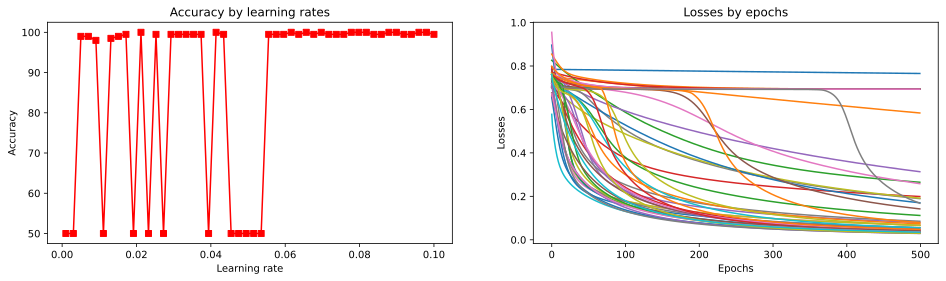

In [ ]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

# first one is learning rate vs total accurary
ax[0].plot(learning_rates, AccByLR, 'rs-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rates')

# second one is epochs vs losses
ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Losses')
ax[1].set_title('Losses by epochs')

plt.plot()

In [ ]:
sum(torch.tensor(AccByLR) >70)/len(AccByLR)



tensor(0.7600)

# 50 Linear solutions to linear problems

Test to remove the 2 ReLU activation functions to see the forecast result

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

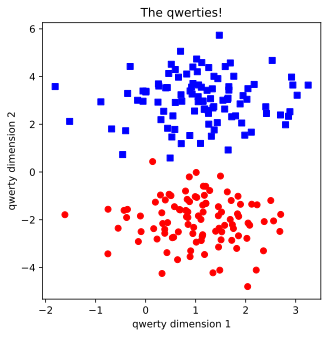

In [ ]:
# create data, the same data as in the last session
nPerClust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# generate data, a and b will be a list of 2 lists, the inter list will be 100 elements
a0 = A[0]+np.random.randn(nPerClust) * blur
a1 = A[1]+np.random.randn(nPerClust) * blur
a = [a0, a1]

b0 = B[0]+np.random.randn(nPerClust) * blur
b1 = B[1]+np.random.randn(nPerClust) * blur
b = [b0, b1]

# true labels, will be 200X1 array, 100 0s, and 100 1s
# zeros is 100 X1, ones is 100 X 1, vstack forms 200  X 1 array
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatenate into a matrix, data_np will be 200 * 2 array
# h stack forms the 2 X 200 array like
# a0, b0
# a1, b1

# after transpose, it forms 200 * 2 array like
# a0.T, a1.T
# b0.T, b1.T
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels ==0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels ==1)[0], 1], 'ro')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:
labels.shape

torch.Size([200, 1])

In [ ]:
def createANNmodel(learning_rate):
  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, 16), # input layer
      #nn.ReLU(), # activation unit
      nn.Linear(16, 1), # hidden layer
      #nn.ReLU(), # activation unit
      nn.Linear(1, 1), # output unit
      nn.Sigmoid(), # final acivation unit
  )

  # loss function
  lossfunc = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learning_rate)

  return ANNclassify, lossfunc, optimizer

In [ ]:
# train models
def train_model(data, y, ANNclassify, lossfunc, optimizer, numepochs = 500):


  losses = torch.zeros((numepochs, 1))
  for epochi in range(numepochs):
    yHat = ANNclassify(data)

    # losses
    loss = lossfunc(yHat, y)
    losses[epochi] = loss

    # back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # final forward pass
    predictions = ANNclassify(data)

    # note: sigmoid the senteri is o.5, if you do below, then accuracy threshold will be 0.5
    # predictions = nn.sigmoid(ANNclassify(data) )



    # compute the predictions and report accuracy, used sigmoid, the threshold should be 0.5
    totalacc = 100 * torch.mean(((predictions >0.5) == labels).float())

  return losses, predictions, totalacc




final accuracy: 100.0000


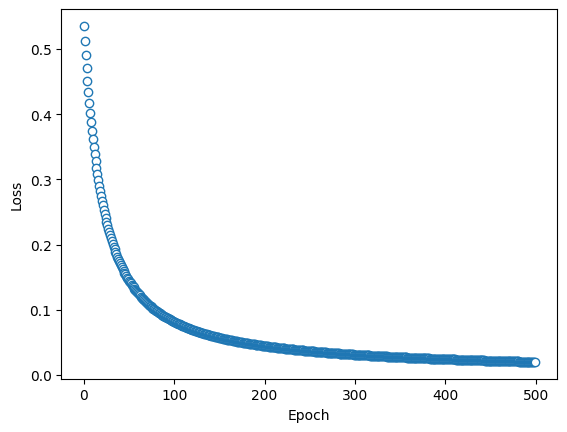

In [ ]:
# Test code by running it once
ANNclassify, lossfunc, optimizer = createANNmodel(0.01)

numepochs = 500

# train
losses, predictions, totalacc = train_model(
    data, labels, ANNclassify, lossfunc, optimizer, numepochs=numepochs
    )

# report accuracy
print(f'final accuracy: {totalacc:.4f}')

# show the loss
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

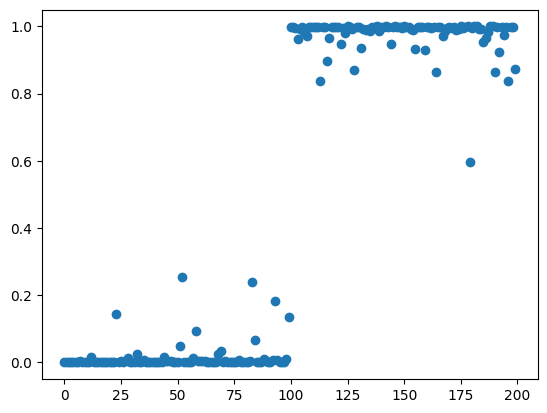

In [ ]:
plt.plot(predictions.detach(), 'o')
plt.show()

In [ ]:
# 100 * torch.mean(((predictions >0.5) == labels).float())
((predictions>0.5) == labels).float().mean() * 100

tensor(100.)

In [ ]:
# for the real test, varying learning rates
learning_rates = np.linspace(0.001, 0.1, 50)

# initialize
AccByLR = []
allLosses = np.zeros((len(learning_rates),numepochs))

for i, lr in enumerate(learning_rates):
  # create the model
  ANNclassify, lossfunc, optimizer = createANNmodel(lr)

  # train the model
  losses, predictions, totalacc = train_model(data, labels, ANNclassify, lossfunc, optimizer, numepochs=numepochs)

  # storing the results
  AccByLR.append(totalacc)
  allLosses[i,:] = losses.detach().T



In [ ]:
allLosses.shape

(50, 500)

[]

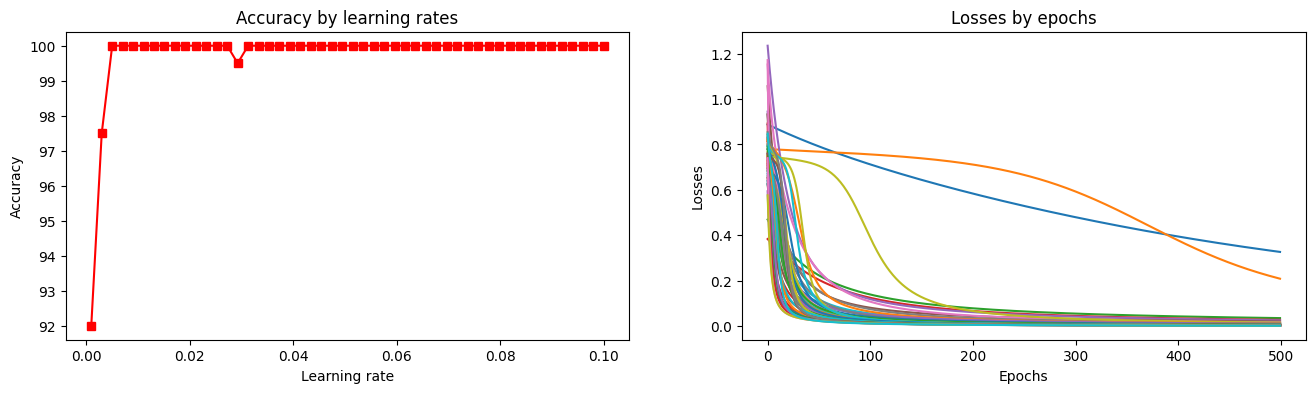

In [ ]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

# first one is learning rate vs total accurary
ax[0].plot(learning_rates, AccByLR, 'rs-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rates')

# second one is epochs vs losses
ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Losses')
ax[1].set_title('Losses by epochs')

plt.plot()

In [ ]:
sum(torch.tensor(AccByLR) >70)/len(AccByLR)



tensor(1.)

Above, the forecast accuracy is significantly increased
In the former section, we are trying to use non-linear model to solve linear problems

Conclusion: if there is no non-linear transformation (non-linear activation function), all linear layers will collapse to one layer.

# 52 Multi-output ANN (iris dataset)

In [1]:
# import and process iris dataset
import seaborn as sns

iris = sns.load_dataset('iris')

# checkout the first few lines of the data
iris.head()

ValueError: 'iris' is not one of the example datasets.

In [ ]:
type(iris)

pandas.core.frame.DataFrame

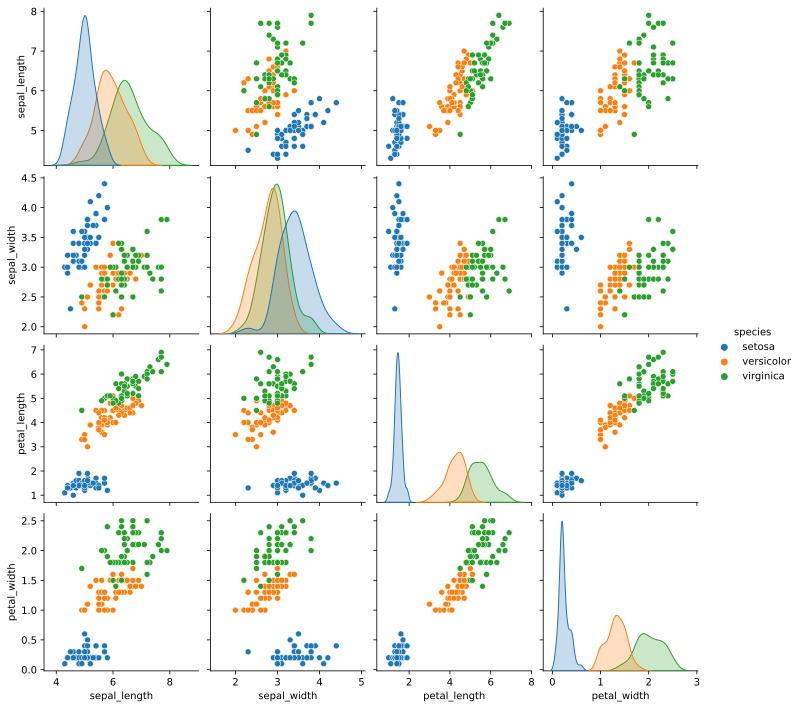

In [ ]:
# some plots to show the data
sns.pairplot(iris, hue = 'species')
plt.show()

In [ ]:
# organize the data

# convert from pandas dataframe to tensor, DataFrame.values will convert Pandas dataframe to an array
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transfor species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris['species'] == 'setosa'] = 0 # not necessary since the initial values are all zero
labels[iris['species'] == 'versicolor'] = 1
labels[iris['species'] == 'virginica'] = 2


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [ ]:
# check the unique values and counts
unique_values, counts = torch.unique(labels, return_counts=True)
unique_values, counts

(tensor([0, 1, 2]), tensor([50, 50, 50]))

In [ ]:
# very similar to np.array
labels_np = np.array(labels)
unique_values, counts = np.unique(labels_np, return_counts=True)
unique_values, counts

(array([0, 1, 2]), array([50, 50, 50]))

Create the ANN model

In [ ]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4, 64), # input layer
    nn.ReLU(), # activation function
    nn.Linear(64, 64), # hidden layer
    nn.ReLU(), # activation
    nn.Linear(64, 3), # output layer

)

lossfunc = nn.CrossEntropyLoss() # it will auto compute Softmax for us(the probabilities of categories will add up to one)

optimizer = torch.optim.SGD(ANNiris.parameters(), lr = 0.01) # stochastic gradient descent

In [ ]:
# train the model
numpochs = 1000

# initialized the losses
losses = torch.zeros(numpochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numpochs):

  # forward pass
  yHat = ANNiris(data) # yHat is a len(data) * 3 tensor forecast

  # compute loss
  loss = lossfunc(yHat, labels)
  losses[epochi] = loss.detach()

  # back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy, argmax is to find the index of the max among the dimension
  # the largest forecast corresponding to the correspondingcategory,
  # that is how the below boolean operations logically stand, indices 0, 1, 2
  # corresponding to labels 0, 1, 2
  matches = torch.argmax(yHat, dim = 1) == labels # booleans (False/True)
  matchesNumeric  = matches.float()
  accuracyPct = 100*matchesNumeric.mean()
  ongoingAcc.append(accuracyPct)

# final forward pass
predictions = ANNiris(data)
predlabels = torch.argmax(predictions, axis = 1)
totalacc = 100 * torch.mean((predlabels == labels).float())



In [ ]:
print(f'The final accuracy is: {totalacc}')

The final accuracy is: 98.0


In [ ]:
# tensor is vectorized
x = torch.tensor([1, 2, 3])
y = torch.tensor([0, 2, 4])

x == y

tensor([False,  True, False])

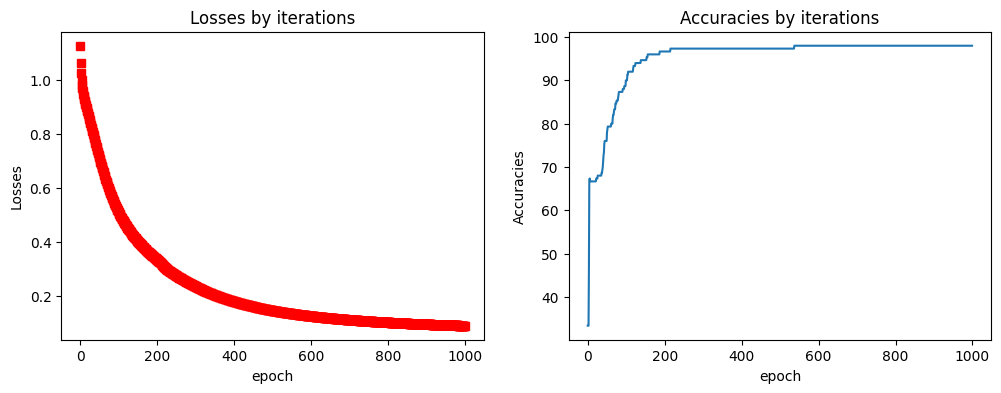

In [ ]:
# visualization
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(losses, 'rs')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Losses')
ax[0]. set_title('Losses by iterations')

ax[1].plot(ongoingAcc)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Accuracies')
ax[1]. set_title('Accuracies by iterations')
plt.show()

In [ ]:
# confirm that all model predictions sum to 1, but only when convert to softmax (in one demension, exp(xi) /sum(exp(xi)))
sm = nn.Softmax(dim = 1) # Softmax is a class, along dim to calculate Softmax
# torch.sum(yHat, axis = 1)
sm(yHat).sum(axis = 1)


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

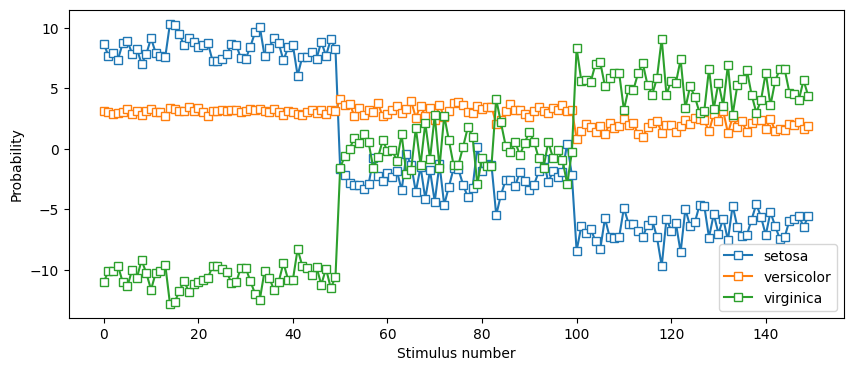

In [ ]:
# plot the raw model output
fix = plt.figure(figsize = (10, 4))
plt.plot(yHat.detach(), 's-', markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

# Setosa (first 50) is really easy to identify, versicolor is a bit mixed with virginical but still high %, and vice versa

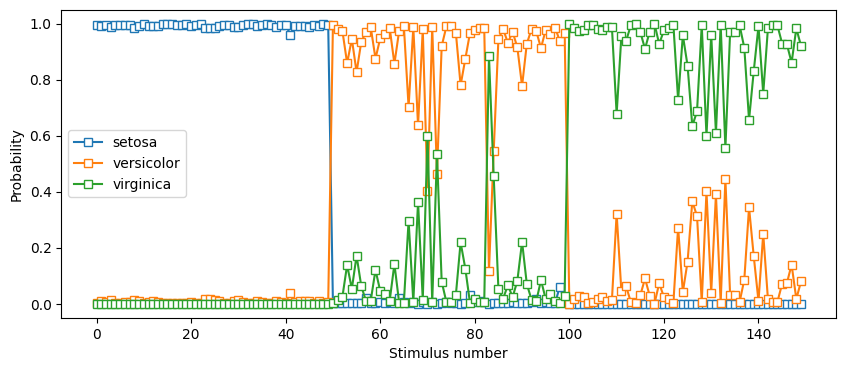

In [ ]:
# plot the Softmax raw model output
fix = plt.figure(figsize = (10, 4))
plt.plot(sm(yHat.detach()), 's-', markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

# Setosa (first 50) is really easy to identify, versicolor is a bit mixed with virginical but still high %, and vice versa

# 53 Code Challenge: more qwerties

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

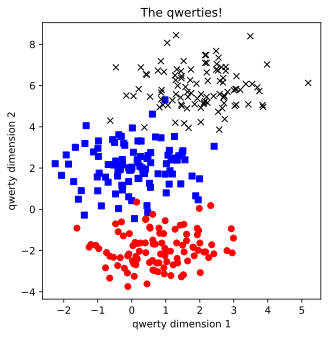

In [ ]:
# make 3 category data
# create data, the same data as in the last session
nPerClust = 100
blur = 1

A = [0, 2]
B = [1, -2]
C = [2, 6]

# generate data, a and b will be a list of 2 lists, the inter list will be 100 elements
a0 = A[0]+np.random.randn(nPerClust) * blur
a1 = A[1]+np.random.randn(nPerClust) * blur
a = [a0, a1]

b0 = B[0]+np.random.randn(nPerClust) * blur
b1 = B[1]+np.random.randn(nPerClust) * blur
b = [b0, b1]

c0 = C[0]+np.random.randn(nPerClust) * blur
c1 = C[1]+np.random.randn(nPerClust) * blur
c = [c0, c1]

# true labels, will be 300X1 array, 100 0s, and 100 1s, 100 2s
labels_np = np.vstack(
    (
        np.zeros((nPerClust, 1)),
        np.ones((nPerClust, 1)),
        np.full((nPerClust, 1), fill_value=2)
        )
    )


# h stack forms the 2 X 300 array like
# a0, b0, c0 # 300 elements
# a1, b1, c1 # 300 elments

# after transpose, it forms 300 * 2 array like
# a0.T, a1.T
# b0.T, b1.T
# c0.T, c1.T

data_np = np.hstack((a, b, c)).T

# labels should by 1D array or tensor


# convert to a pytorch tensor
data = torch.tensor(data_np).float()

labels_np = labels_np.ravel()
labels = torch.tensor(labels_np).long()


# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels ==0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels ==1)[0], 1], 'ro')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels ==2)[0], 1], 'kx')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:
torch.unique(labels, return_counts= True)

(tensor([0, 1, 2]), tensor([100, 100, 100]))

In [ ]:
# model architecture
ANN3Cates = nn.Sequential(
    nn.Linear(2, 64), # input layer,
    nn.ReLU(), # activation
    nn.Linear(64, 3),
    # nn.ReLU(),
    # nn.Linear(64, 3)
)

lossfunc = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANN3Cates.parameters(), lr = 0.01)


In [ ]:
# train model
numepochs = 1000

# initialized the losses
losses = torch.zeros(numepochs)
AllAccuracy = []


# loop over epochs

for epochi in range(numepochs):

  # forward pass
  yHat = ANN3Cates(data)

  # calcluate loss, storing loss into loss
  loss = lossfunc(yHat, labels)
  losses[epochi] = loss.detach()

  # back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # calculate accuracy
  matches = yHat.argmax(dim = 1) == labels
  matches_numeric = matches.float()
  accuracy = 100 * torch.sum(matches_numeric) / len(labels)

  AllAccuracy.append(accuracy)

# final forward pass
predictions = ANN3Cates(data)
predlabels = torch.argmax(predictions, axis = 1)
TotalPredAcc = torch.mean((predlabels == labels).float())


In [ ]:
print(f'Overall forecast accuracy: {TotalPredAcc:.4f}')

Overall forecast accuracy: 0.9767


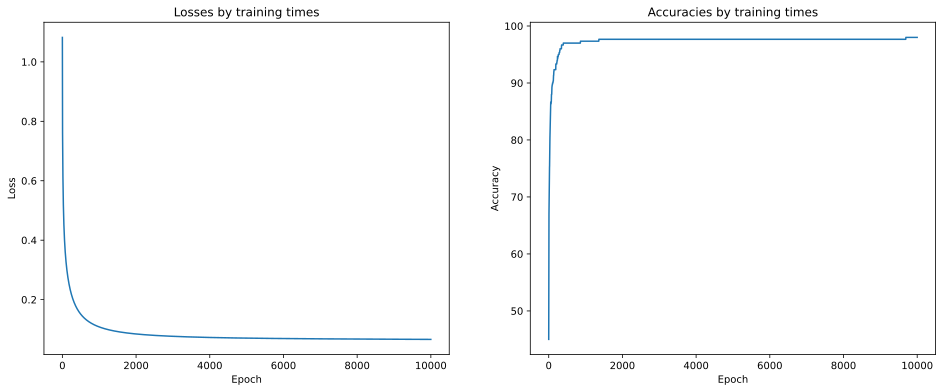

In [ ]:
# visualize losses and accuracy
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].plot(losses)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses by training times')

ax[1].plot(AllAccuracy)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracies by training times')

plt.show()

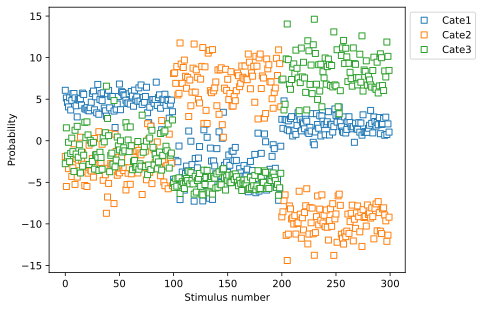

In [ ]:
# plot the raw model output
plt.plot(yHat.detach(), 's', markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['Cate1', 'Cate2', 'Cate3'], bbox_to_anchor = (1, 1))
plt.show()
plt.show()

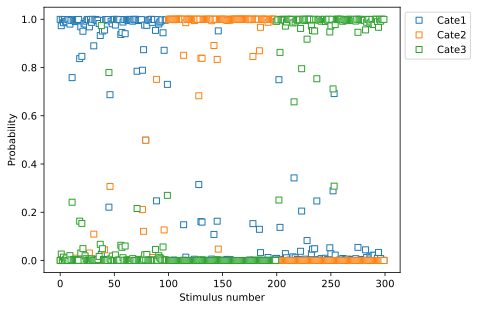

In [ ]:
# calculate Softmax and made a visualizion
sm = nn.Softmax(dim = 1) # along the demension of 1
# plot the raw model output
plt.plot(sm(yHat).detach(), 's', markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['Cate1', 'Cate2', 'Cate3'], bbox_to_anchor = (1, 1))
plt.show()
plt.show()

# not very good, but not too bad.

In [ ]:
ar = np.array([
    list(range(1,5)),
    list(range(5, 9))
])

In [ ]:
ar.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8])

# 54 Comparing the number of hidden units

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# import and process iris dataset
import seaborn as sns

iris = sns.load_dataset('iris')

# checkout the first few lines of the data
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
# some plots to show the data
# sns.pairplot(iris, hue = 'species')
# plt.show()

In [ ]:
# organize the data

# convert from pandas dataframe to tensor, DataFrame.values will convert Pandas dataframe to an array
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transfor species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris['species'] == 'setosa'] = 0 # not necessary since the initial values are all zero
labels[iris['species'] == 'versicolor'] = 1
labels[iris['species'] == 'virginica'] = 2


In [ ]:
# check the unique values and counts
unique_values, counts = torch.unique(labels, return_counts=True)
unique_values, counts

(tensor([0, 1, 2]), tensor([50, 50, 50]))

In [ ]:
# very similar to np.array
labels_np = np.array(labels)
unique_values, counts = np.unique(labels_np, return_counts=True)
unique_values, counts

(array([0, 1, 2]), array([50, 50, 50]))

Create the ANN model

In [ ]:
# model architecture
def create_model(n_unit, lr = 0.01):
  ANNiris = nn.Sequential(
      nn.Linear(4, n_unit), # input layer
      nn.ReLU(), # activation function
      nn.Linear(n_unit,n_unit), # hidden layer
      nn.ReLU(), # activation
      nn.Linear(n_unit, 3), # output layer

  )

  lossfunc = nn.CrossEntropyLoss() # it will auto compute Softmax for us(the probabilities of categories will add up to one)

  optimizer = torch.optim.SGD(ANNiris.parameters(), lr = 0.01) # stochastic gradient descent

  return ANNiris, lossfunc, optimizer

In [ ]:
def train_model(ANNModel, lossfunc, optimizer, numepochs = 1000):

  # initialized the losses
  losses = torch.zeros(numepochs)
  ongoingAcc = []
  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNModel(data) # yHat is a len(data) * 3 tensor forecast

    # compute loss
    loss = lossfunc(yHat, labels)
    losses[epochi] = loss.detach()

    # back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy, argmax is to find the index of the max among the dimension
    # the largest forecast corresponding to the correspondingcategory,
    # that is how the below boolean operations logically stand, indices 0, 1, 2
    # corresponding to labels 0, 1, 2
    matches = torch.argmax(yHat, dim = 1) == labels # booleans (False/True)
    matchesNumeric  = matches.float()
    accuracyPct = 100*matchesNumeric.mean()
    ongoingAcc.append(accuracyPct)

  # final forward pass
  predictions = ANNModel(data)
  predlabels = torch.argmax(predictions, axis = 1)
  totalacc = 100 * torch.mean((predlabels == labels).float())

  return totalacc



In [ ]:
# run one experiment to see whether it works
ANNiris, lossfunc, optimizer = create_model(16)

  # train model

totalacc = train_model(ANNiris, lossfunc, optimizer, numepochs= 1000)

totalacc

tensor(98.)

In [ ]:
# run meta-parameric, changing number of hidden unit
n_units = 128
numepochs = 150
Accuracies_unit = []

for n_unit in range(1, n_units+1):
  # model
  ANNiris, lossfunc, optimizer = create_model(n_unit)

  # train model

  totalacc = train_model(ANNiris, lossfunc, optimizer, numepochs= numepochs)

  Accuracies_unit.append(totalacc)


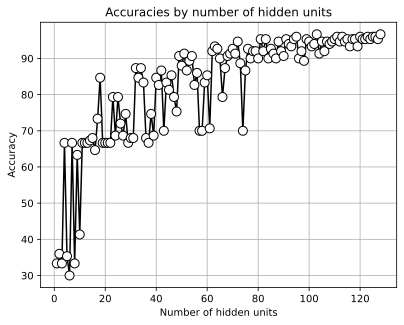

In [ ]:
plt.plot(range(1, n_units+1), Accuracies_unit, 'ko-', markerfacecolor = 'w', markersize = 9)
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracies by number of hidden units')
plt.show()

# increasing number of hidden units will improve the accuracy.
# however, if epoch is high, the curve is very very steep

In [ ]:
# run meta-parameric, changing number of hidden unit
n_units = 128
numepochs = 1000
Accuracies_unit = []

for n_unit in range(1, n_units+1):
  # model
  ANNiris, lossfunc, optimizer = create_model(n_unit)

  # train model

  totalacc = train_model(ANNiris, lossfunc, optimizer, numepochs= numepochs)

  Accuracies_unit.append(totalacc)

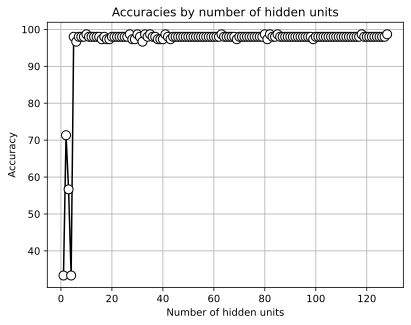

In [ ]:
plt.plot(range(1, n_units+1), Accuracies_unit, 'ko-', markerfacecolor = 'w', markersize = 9)
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracies by number of hidden units')
plt.show()

In [ ]:
# run meta-parameric, changing number of hidden unit

# CHANGE LEARNING RATES
n_units = 128
numepochs = 1000
Accuracies_unit = []

for n_unit in range(1, n_units+1):
  # model
  ANNiris, lossfunc, optimizer = create_model(n_unit, lr = 0.001)

  # train model

  totalacc = train_model(ANNiris, lossfunc, optimizer, numepochs= numepochs)

  Accuracies_unit.append(totalacc)

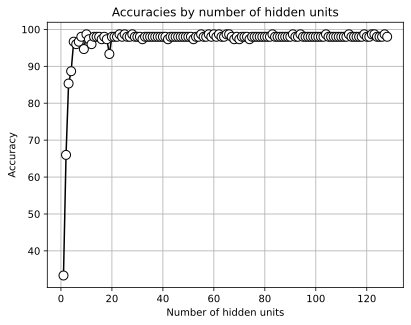

In [ ]:
plt.plot(range(1, n_units+1), Accuracies_unit, 'ko-', markerfacecolor = 'w', markersize = 9)
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracies by number of hidden units')
plt.show()

In [ ]:
# run meta-parameric, changing number of hidden unit

# CHANGE LEARNING RATES, 1, 0.1, 0.01, 0.001 does not help much
n_units = 128
numepochs = 150
Accuracies_unit = []

for n_unit in range(1, n_units+1):
  # model
  ANNiris, lossfunc, optimizer = create_model(n_unit, lr = 1)

  # train model

  totalacc = train_model(ANNiris, lossfunc, optimizer, numepochs= numepochs)

  Accuracies_unit.append(totalacc)

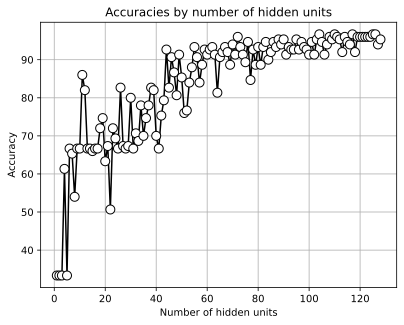

In [ ]:
plt.plot(range(1, n_units+1), Accuracies_unit, 'ko-', markerfacecolor = 'w', markersize = 9)
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracies by number of hidden units')
plt.show()

# 55 Depth and breadth: number of parameters

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
# build two models

widenet = nn.Sequential(
    nn.Linear(2, 4), # hidden layer
    nn.Linear(4, 3),
)

deepnet = nn.Sequential(
    nn.Linear(2, 2), # hidden layer
    nn.Linear(2, 2), # hidden layer
    nn.Linear(2, 3),
)

In [ ]:
# print them out to have a look
print(widenet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)


In [ ]:
print(deepnet)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [ ]:
widenet.named_parameters()

<generator object Module.named_parameters at 0x7cc9a6a850e0>

Peeking inside the network

In [ ]:
for p in deepnet.named_parameters():
  print(p)

  print('-----------------------------------------------')

('0.weight', Parameter containing:
tensor([[ 0.4184, -0.1523],
        [-0.2593,  0.1599]], requires_grad=True))
-----------------------------------------------
('0.bias', Parameter containing:
tensor([-0.3562, -0.2290], requires_grad=True))
-----------------------------------------------
('1.weight', Parameter containing:
tensor([[-0.6182, -0.5483],
        [ 0.4247,  0.3745]], requires_grad=True))
-----------------------------------------------
('1.bias', Parameter containing:
tensor([0.6628, 0.0787], requires_grad=True))
-----------------------------------------------
('2.weight', Parameter containing:
tensor([[-0.5155,  0.1033],
        [-0.5780,  0.1515],
        [-0.0546, -0.2877]], requires_grad=True))
-----------------------------------------------
('2.bias', Parameter containing:
tensor([ 0.5515,  0.0526, -0.2855], requires_grad=True))
-----------------------------------------------


In [ ]:
numNodesInWide = 0
for p in widenet.named_parameters():
  if 'bias' in p[0]:
    numNodesInWide += len(p[1])

numNodesInDeep = 0
for paraName, paramVect in deepnet.named_parameters():
  if 'bias' in paraName:
    numNodesInDeep += len(paramVect)
print(f'Number of nodes in Widenet: {numNodesInWide}; Number of nodes in Deepnet: {numNodesInDeep}')

Number of nodes in Widenet: 7; Number of nodes in Deepnet: 7


In [ ]:
# count total number of trainable parameters

#THE CODE IN THE COURSE DOES NOT WORK
n_params = 0
for paramName, paramVec in widenet.named_parameters():
  if paramVec.requires_grad:
    print(f'This piece has {paramVec.numel()}')
    n_params += paramVec.numel()

print(f'\n\nTotal number of trainable parameters are {n_params}')


This piece has 8
This piece has 4
This piece has 12
This piece has 3


Total number of trainable parameters are 27


In [ ]:
# use list comprehension
n_params = sum([v.numel() for p, v in widenet.named_parameters() if v.requires_grad])
n_params

27

In [ ]:
n_params = sum([v.numel() for p, v in deepnet.named_parameters() if v.requires_grad])
n_params

21

In [ ]:
# a nice simple way to print out the model info.
from torchsummary import summary
summary(widenet, (1000000, 2)) # the tuple represent the size of the input

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1           [-1, 1000000, 4]              12
            Linear-2           [-1, 1000000, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 7.63
Forward/backward pass size (MB): 53.41
Params size (MB): 0.00
Estimated Total Size (MB): 61.04
----------------------------------------------------------------


# 56 Defining models using sequential vs class

In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

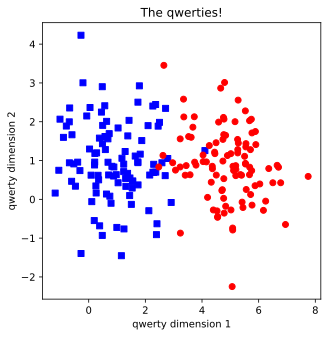

In [ ]:
# create data

nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]


# generate data, a and b will be a list of 2 lists, the inter list will be 100 elements
a0 = A[0]+np.random.randn(nPerClust) * blur
a1 = A[1]+np.random.randn(nPerClust) * blur
a = [a0, a1]

b0 = B[0]+np.random.randn(nPerClust) * blur
b1 = B[1]+np.random.randn(nPerClust) * blur
b = [b0, b1]

# true labels, will be 200X1 array, 100 0s, and 100 1s
# zeros is 100 X1, ones is 100 X 1, vstack forms 200  X 1 array
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatenate into a matrix, data_np will be 200 * 2 array
# h stack forms the 2 X 200 array like
# a0, b0
# a1, b1

# after transpose, it forms 200 * 2 array like
# a0.T, a1.T
# b0.T, b1.T
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels ==0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels ==1)[0], 1], 'ro')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:
# define the class
class theClass4ANN(nn.Module):
  def __init__(self):
    super().__init__()

    # input layer
    self.input = nn.Linear(2, 1)

    # output layer
    self.output = nn.Linear(1, 1)

  def forward(self, x):

    # pass through the input
    x = self.input(x)

    # apply relu
    x = F.relu(x)

    # output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x

In [ ]:
# create an instance of the class
ANNclassify = theClass4ANN()

In [ ]:
# the other model features
lossfunc = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = 0.01)

In [ ]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward propogate
  yHat = ANNclassify(data)

  # losses
  loss = lossfunc(yHat, labels)
  losses[epochi] = loss

  # back propogate
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# 57 Model depth vs breadth

In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Import and organize data

In [ ]:
# import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

# conver to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to number
labels = torch.zeros(len(iris), dtype = torch.long)
labels[iris['species'] == 'versicolor'] = 1
labels[iris['species'] == 'virginica'] = 2


## Construct and sanity check the model

In [ ]:
# create a class for the model
class ANNiris(nn.Module):
  def __init__(self, n_units, n_layers):
    super().__init__()

    # create dictionary to store the layers
    # special type of dictionary,comes with torch, specifically design to store layers of deep learning nn
    self.layers = nn.ModuleDict()

    # input layer
    self.layers['input'] = nn.Linear(4, n_units)

    # hidden layers
    for i in range(n_layers):
      self.layers[f'hidden{i}'] = nn.Linear(n_units, n_units)

    # output layer
    self.layers['output'] = nn.Linear(n_units, 3)

  # Forward pass

  def forward(self, x):
    # the course do it differently
    for key, layer in self.layers.items():
      if key == 'output':
        x = layer(x)
      else:
        x = F.relu(layer(x))

    # x = torch.sigmoid(x)

    return x


In [ ]:
# instantiate the model
nUnitesPerLayer = 12
nLayers = 4
net = ANNiris(nUnitesPerLayer, nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [ ]:
# do quick test
tmpx= torch.randn(10, 4)

# run it through the DL
y = net(tmpx)

# print the dimension
print(y.shape)

# print output
print(y)

torch.Size([10, 3])
tensor([[ 0.2287,  0.1716, -0.0095],
        [ 0.2309,  0.1742, -0.0072],
        [ 0.2304,  0.1740, -0.0076],
        [ 0.2298,  0.1731, -0.0096],
        [ 0.2291,  0.1721, -0.0096],
        [ 0.2335,  0.1752, -0.0043],
        [ 0.2326,  0.1743, -0.0028],
        [ 0.2291,  0.1713, -0.0103],
        [ 0.2300,  0.1735, -0.0092],
        [ 0.2313,  0.1742, -0.0066]], grad_fn=<AddmmBackward0>)


In [ ]:
# define a train function
def train_model(model, x, y, numepochs = 1000):

  # define loss function and optimizer
  lossfunc = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

  losses = torch.zeros(numepochs)
  for epochi in range(numepochs):
    # forward pass
    yHat = model(x)

    # loss
    loss = lossfunc(yHat, y)
    losses[epochi] = loss

    # back proprogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = model(x)
  predlabels = torch.argmax(predictions, axis = 1)
  matches = predlabels.detach() == y
  matches_num = matches.float()
  accuracy = matches_num.mean() *100

  # total number of trainable parameters in the model
  nParams = sum(p.numel() for p in model.parameters() if p.requires_grad)

  return accuracy, nParams


In [ ]:
# test the function once
numepochs = 2500


acc, nParams = train_model(net, data, labels, numepochs=numepochs)

In [ ]:
acc, nParams

(tensor(98.), 723)

In [ ]:
# run param test

numlayers = range(1, 6)
numunits = np.arange(4, 101, 3)
numepochs = 500

# initialize output matrices
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits),len(numlayers)))

for unitidx in range(len(numunits)):
  n_unit = numunits[unitidx]
  for layeridx in range(len(numlayers)):
    n_layer = numlayers[layeridx]

    # model
    net = ANNiris(n_unit, n_layer)

    # train model
    acc, nParams = train_model(net, data, labels, numepochs=numepochs)

    # store results
    accuracies[unitidx, layeridx] = acc
    totalparams[unitidx, layeridx] = nParams







In [ ]:
accuracies.shape

(33, 5)

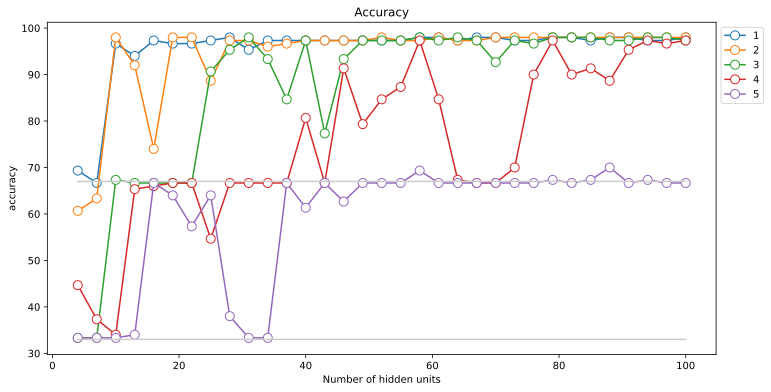

In [ ]:
# show accuracy as a function of model depth

fig, ax = plt.subplots(1, figsize = (12, 6))
ax.plot(numunits, accuracies, 'o-', markerfacecolor = 'w', markersize = 9)
ax.plot(numunits[[0, -1]], [33, 33], color = [0.8, 0.8, 0.8])
ax.plot(numunits[[0, -1]], [67, 67], color = [0.8, 0.8, 0.8])
ax.legend(numlayers, bbox_to_anchor = (1, 1))
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')

plt.show()

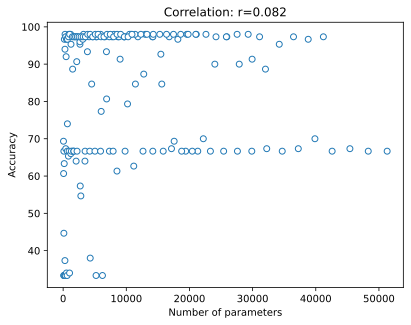

In [ ]:
# is more parameters, better performance
x = totalparams.flatten()
y = accuracies.flatten()

r = np.corrcoef(x, y)[0, 1]

# scatter plot
plt.plot(x, y, 'o', markerfacecolor = 'w')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r, 3)))
plt.show()


# Conclusion, the performance is in the reverse relation with number of parameters in this case. However, when increasing training epochs to
# for example 2500, just a bit increasing number of units, there is long plateau for performance

In [ ]:
# run param test

numlayers = range(1, 6)
numunits = np.arange(4, 101, 3)
numepochs = 2500

# initialize output matrices
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits),len(numlayers)))

for unitidx in range(len(numunits)):
  n_unit = numunits[unitidx]
  for layeridx in range(len(numlayers)):
    n_layer = numlayers[layeridx]

    # model
    net = ANNiris(n_unit, n_layer)

    # train model
    acc, nParams = train_model(net, data, labels, numepochs=numepochs)

    # store results
    accuracies[unitidx, layeridx] = acc
    totalparams[unitidx, layeridx] = nParams







In [ ]:
accuracies.shape

(33, 5)

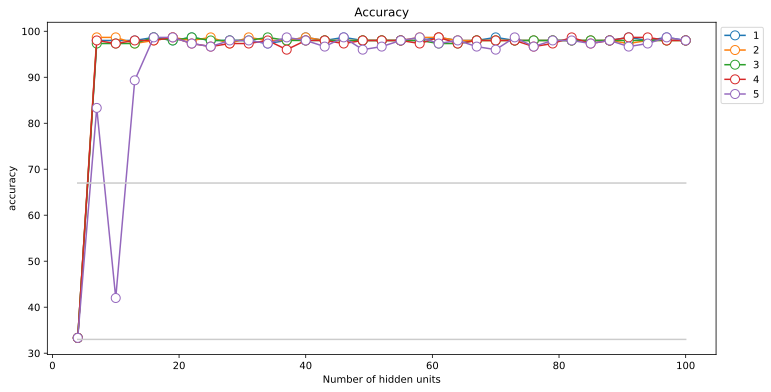

In [ ]:
# show accuracy as a function of model depth

fig, ax = plt.subplots(1, figsize = (12, 6))
ax.plot(numunits, accuracies, 'o-', markerfacecolor = 'w', markersize = 9)
ax.plot(numunits[[0, -1]], [33, 33], color = [0.8, 0.8, 0.8])
ax.plot(numunits[[0, -1]], [67, 67], color = [0.8, 0.8, 0.8])
ax.legend(numlayers, bbox_to_anchor = (1, 1))
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')

plt.show()

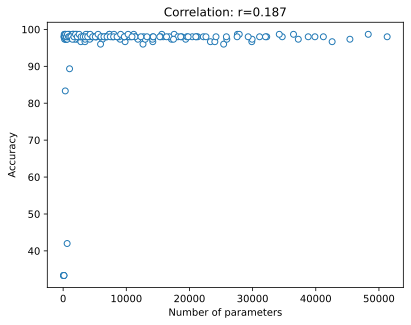

In [ ]:
# is more parameters, better performance
x = totalparams.flatten()
y = accuracies.flatten()

r = np.corrcoef(x, y)[0, 1]

# scatter plot
plt.plot(x, y, 'o', markerfacecolor = 'w')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r, 3)))
plt.show()


# 58 Code challenge: convert Sequential to class

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

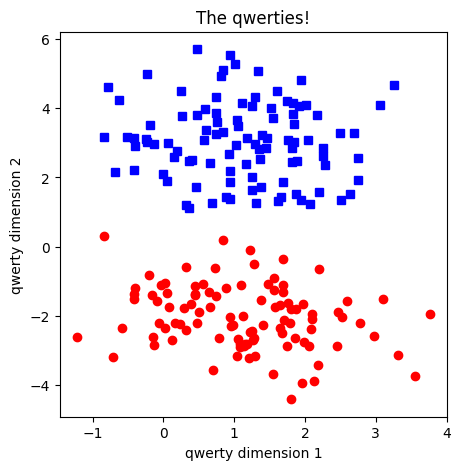

In [ ]:
# create data, the same data as in the last session
nPerClust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# generate data, a and b will be a list of 2 lists, the inter list will be 100 elements
a0 = A[0]+np.random.randn(nPerClust) * blur
a1 = A[1]+np.random.randn(nPerClust) * blur
a = [a0, a1]

b0 = B[0]+np.random.randn(nPerClust) * blur
b1 = B[1]+np.random.randn(nPerClust) * blur
b = [b0, b1]

# true labels, will be 200X1 array, 100 0s, and 100 1s
# zeros is 100 X1, ones is 100 X 1, vstack forms 200  X 1 array
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatenate into a matrix, data_np will be 200 * 2 array
# h stack forms the 2 X 200 array like
# a0, b0
# a1, b1

# after transpose, it forms 200 * 2 array like
# a0.T, a1.T
# b0.T, b1.T
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels ==0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels ==1)[0], 1], 'ro')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:
class class4ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(2, 16)
    self.hidden = nn.Linear(16, 1)
    self.output = nn.Linear(1, 1)

  def forward(self, x):
    x = self.input(x)
    x = F.relu(x)
    x = self.hidden(x)
    x = F.relu(x)
    x = self.output(x)
    x = torch.sigmoid(x)
    return x



In [ ]:
def createANNmodel(learning_rate):
  # model architecture
  ANNclassify = class4ANN()
  # loss function
  lossfunc = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learning_rate)

  return ANNclassify, lossfunc, optimizer

In [ ]:
# train models
def train_model(data, y, ANNclassify, lossfunc, optimizer, numepochs = 500):


  losses = torch.zeros((numepochs, 1))
  for epochi in range(numepochs):
    yHat = ANNclassify(data)

    # losses
    loss = lossfunc(yHat, y)
    losses[epochi] = loss

    # back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # final forward pass
    predictions = ANNclassify(data)

    # note: sigmoid the senteri is o.5, if you do below, then accuracy threshold will be 0.5
    # predictions = nn.sigmoid(ANNclassify(data) )



    # compute the predictions and report accuracy, used sigmoid, the threshold should be 0.5
    totalacc = 100 * torch.mean(((predictions >0.5) == labels).float())

  return losses, predictions, totalacc




final accuracy: 99.0000


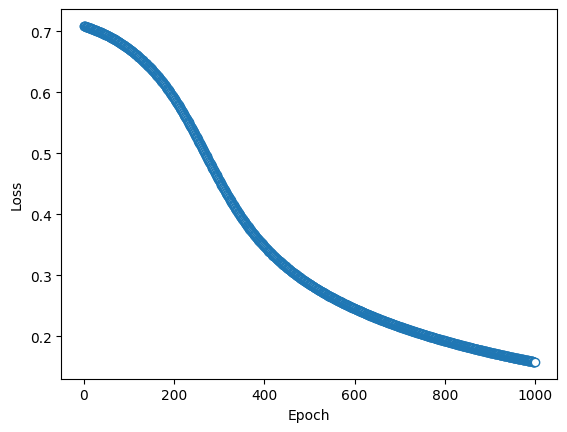

In [ ]:
# Test code by running it once
ANNclassify, lossfunc, optimizer = createANNmodel(0.01)
numepochs = 1000
# train
losses, predictions, totalacc = train_model(
    data, labels, ANNclassify, lossfunc, optimizer, numepochs=numepochs
    )

# report accuracy
print(f'final accuracy: {totalacc:.4f}')

# show the loss
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

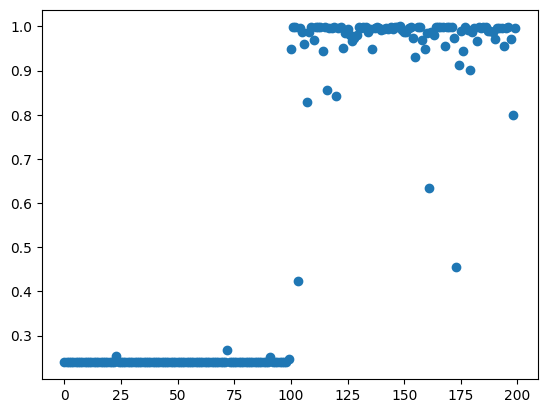

In [ ]:
plt.plot(predictions.detach(), 'o')
plt.show()

In [ ]:
# 100 * torch.mean(((predictions >0.5) == labels).float())
((predictions>0.5) == labels).float().mean() * 100

tensor(99.)

In [ ]:
# for the real test, varying learning rates
learning_rates = np.linspace(0.001, 0.1, 50)

# initialize
AccByLR = []
allLosses = np.zeros((len(learning_rates),numepochs))

for i, lr in enumerate(learning_rates):
  # create the model
  ANNclassify, lossfunc, optimizer = createANNmodel(lr)

  # train the model
  losses, predictions, totalacc = train_model(data, labels, ANNclassify, lossfunc, optimizer, numepochs=numepochs)

  # storing the results
  AccByLR.append(totalacc)
  allLosses[i,:] = losses.detach().T



In [ ]:
allLosses.shape

(50, 1000)

[]

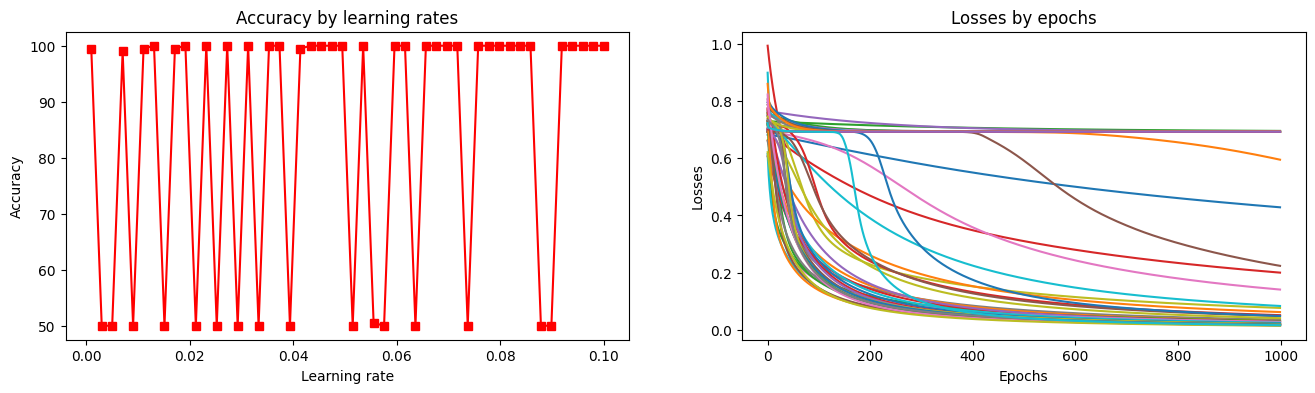

In [ ]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

# first one is learning rate vs total accurary
ax[0].plot(learning_rates, AccByLR, 'rs-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rates')

# second one is epochs vs losses
ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Losses')
ax[1].set_title('Losses by epochs')

plt.plot()

In [ ]:
sum(torch.tensor(AccByLR) >70)/len(AccByLR)



tensor(0.6800)